<a href="https://colab.research.google.com/github/BalnurShulenbay/Data-Analysis/blob/main/Clustering_Travel_Agency_Booking_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Travel Agency Booking Data

In [ ]:
# Import our modules
import pandas as pd
import numpy as np
import statsmodels as sm
import pylab as pl
from scipy import stats
#from sklearn.externals.six import StringIO
from sklearn import preprocessing
from sklearn import cluster, tree, decomposition
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

In [ ]:
# Download our dataset
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/travel.csv"
travel = pd.read_csv(file_name)

In [ ]:
#Get our first 5 columns
travel.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,...,0,1,8286,1,0,1,0,63,1258,68
1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,...,0,1,1842,3,0,1,2,198,786,37
2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,...,0,1,8746,1,0,1,6,105,29,22
3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,...,0,1,6210,3,1,1,2,198,1234,42
4,4878884,2014-06-10 13:34:56,2,3,66,174,50644,NaN,596177,0,...,1,1,12812,5,0,1,2,50,368,83


In [ ]:
#Get statistics for our Numerical Columns
travel.describe()

,Unnamed: 0,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,63915.000000,1.000000e+05,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.882530e+07,9.838570,2.678150,85.995070,308.636990,27676.391240,1960.661721,6.054383e+05,0.133770,0.248140,...,0.336750,1.111750,14426.32738,2.577290,0.079930,1.487980,3.150920,81.093290,598.848330,49.860370
std,1.086183e+07,11.996426,0.749018,59.292002,208.706581,16768.647409,2228.153377,3.516154e+05,0.340407,0.431936,...,0.734449,0.451602,11036.98122,2.149263,0.271186,1.280262,1.620534,56.111519,510.959297,28.885423
min,1.012000e+03,2.000000,0.000000,0.000000,0.000000,0.000000,0.005600,1.400000e+01,0.000000,0.000000,...,0.000000,0.000000,4.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9.448967e+06,2.000000,3.000000,66.000000,174.000000,12949.000000,312.792100,2.987962e+05,0.000000,0.000000,...,0.000000,1.000000,8267.00000,1.000000,0.000000,1.000000,2.000000,50.000000,158.000000,25.000000
50%,1.881212e+07,2.000000,3.000000,66.000000,314.000000,27655.000000,1131.835300,6.028825e+05,0.000000,0.000000,...,0.000000,1.000000,9145.00000,1.000000,0.000000,1.000000,2.000000,50.000000,591.000000,49.000000
75%,2.825307e+07,15.000000,3.000000,70.000000,385.000000,42328.000000,2542.359350,9.157222e+05,0.000000,0.000000,...,0.000000,1.000000,18784.00000,5.000000,0.000000,2.000000,4.000000,106.000000,701.000000,73.000000
max,3.767009e+07,53.000000,4.000000,239.000000,1025.000000,56507.000000,11965.376100,1.198783e+06,1.000000,1.000000,...,9.000000,8.000000,65035.00000,9.000000,1.000000,120.000000,6.000000,212.000000,2117.000000,99.000000


In [ ]:
#Check for missing values
travel.isnull().sum().sort_values(ascending=False)

,0
orig_destination_distance,36085
srch_ci,122
srch_co,122
hotel_market,0
hotel_country,0
hotel_continent,0
cnt,0
is_booking,0
srch_destination_type_id,0
srch_destination_id,0


Let's add a new column 'count' to see how many bookings each user did

In [ ]:
# default ‘inner’, merging on user_id
travel = travel.merge(travel.groupby('user_id')['is_booking'].agg(['count']).reset_index())
travel.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,count
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,...,1,8286,1,0,1,0,63,1258,68,2
1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,...,1,1842,3,0,1,2,198,786,37,1
2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,...,1,8746,1,0,1,6,105,29,22,1
3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,...,1,6210,3,1,1,2,198,1234,42,2
4,4878884,2014-06-10 13:34:56,2,3,66,174,50644,NaN,596177,0,...,1,12812,5,0,1,2,50,368,83,1


Let's drop the bookings rows with count of 0 adults and 0 children

In [ ]:
travel.drop(travel[travel['srch_adults_cnt'] + travel['srch_children_cnt']==0].index).head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,count
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,...,1,8286,1,0,1,0,63,1258,68,2
1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,...,1,1842,3,0,1,2,198,786,37,1
2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,...,1,8746,1,0,1,6,105,29,22,1
3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,...,1,6210,3,1,1,2,198,1234,42,2
4,4878884,2014-06-10 13:34:56,2,3,66,174,50644,NaN,596177,0,...,1,12812,5,0,1,2,50,368,83,1


Let's change column type to datetime

In [ ]:
#'srch_ci'- check in date, 'srch_co'- check out date
travel['srch_ci'] = pd.to_datetime(travel['srch_ci'])
travel['srch_co'] = pd.to_datetime(travel['srch_co'])
travel['date_time'] = pd.to_datetime(travel['date_time'])

# Change the timestamp of 'date_time' (2014-11-03 16:02:28) to simply "2014-11-03"
travel['date'] = pd.to_datetime(travel['date_time'].apply(lambda x: x.date()))

travel.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,count,date
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,...,8286,1,0,1,0,63,1258,68,2,2014-11-03
1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,...,1842,3,0,1,2,198,786,37,1,2013-03-13
2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,...,8746,1,0,1,6,105,29,22,1,2014-10-13
3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,...,6210,3,1,1,2,198,1234,42,2,2013-11-05
4,4878884,2014-06-10 13:34:56,2,3,66,174,50644,NaN,596177,0,...,12812,5,0,1,2,50,368,83,1,2014-06-10


In [ ]:
# Drop the columns where:
# Check-in date was later than check-out date
# Booking date was later than Check-in date
travel = travel.drop(travel[travel['srch_co'] < travel['srch_ci']].index)
travel = travel.drop(travel[travel['srch_ci'] < travel['date']].index)

In [ ]:
#Let's check if code above worked
travel[travel['srch_co'] < travel['srch_ci']][['srch_co', 'srch_ci']]
travel[travel['srch_ci'] < travel['date']][['srch_ci', 'date']]

,srch_ci,date


# Feature engineering

In [ ]:
#Let's create some new columns that can provide some useful info (to use when doing clusters/decision trees)
def duration(row):
    '''Gives the duration of trip by taking the row as an input and finding the time (in days) beween checkin and checkout'''
    delta = (row['srch_co'] - row['srch_ci'])/np.timedelta64(1, 'D')
    if delta <= 0:
        return np.nan
    else:
        return delta

def days_in_advance(row):
    '''Gives the days the trip was booked in advance'''
    delta = (row['srch_ci'] - row['date'])/np.timedelta64(1, 'D')
    if delta < 0:
        return np.nan
    else:
        return delta

# Duration is the length of stay by substracting the checkout day from the checkin day
travel['duration'] = travel.apply(duration, axis=1)

# Shows how long in advance the booking was made. Done by substracting the checkin date from the booking date
travel['days_in_advance'] = travel.apply(days_in_advance, axis=1)

In [75]:
#lets get data types of each column
travel.dtypes

,0
Unnamed: 0,int64
date_time,datetime64[ns]
site_name,int64
posa_continent,int64
user_location_country,int64
user_location_region,int64
user_location_city,int64
orig_destination_distance,float64
user_id,int64
is_mobile,int64


In [ ]:
travel.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,count,date,duration,days_in_advance
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,...,0,1,0,63,1258,68,2,2014-11-03,4.0,42.0
1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,...,0,1,2,198,786,37,1,2013-03-13,1.0,0.0
2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,...,0,1,6,105,29,22,1,2014-10-13,7.0,172.0
3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,...,1,1,2,198,1234,42,2,2013-11-05,1.0,2.0
4,4878884,2014-06-10 13:34:56,2,3,66,174,50644,NaN,596177,0,...,0,1,2,50,368,83,1,2014-06-10,5.0,54.0


# Statistical Analysis of Booking Channels


In [ ]:
# Let's look at how each channel performs by seeing the booking rate for each channel type
# booking rate per channel
travel.groupby('channel')['is_booking'].agg(booking_rate='mean', num_of_bookings='count').reset_index().sort_values(by='channel')


,channel,booking_rate,num_of_bookings
0,0,0.071959,12521
1,1,0.069613,10271
2,2,0.060529,7831
3,3,0.060427,4402
4,4,0.120784,2194
5,5,0.094364,6157
6,6,0.067901,162
7,7,0.043210,810
8,8,0.055351,271
9,9,0.085383,55339


In [ ]:
def stats_comparison(i):
    '''Returns a breakdown of stats per channel'''
    travel.groupby(i)['is_booking'].agg(average = 'mean', bookings = 'count').reset_index()
    cat = travel.groupby(i)['is_booking'].agg(sub_average = 'mean',sub_bookings = 'count').reset_index()
    cat['overall_average'] = travel['is_booking'].mean()
    cat['overall_bookings'] = travel['is_booking'].count()
    # Gives the sum of the other types of bookings
    cat['rest_bookings'] = cat['overall_bookings'] - cat['sub_bookings']
    # Gives the average of the other bookings.
    cat['rest_average'] = (cat['overall_bookings']*cat['overall_average'] - cat['sub_bookings']*cat['sub_average'])/cat['rest_bookings']
    # A z-score is the number of standard deviations from the mean a data point is.
    # We get the z-scores for channel average compared to the average of the others (excluding the channel we are analyzing)
    cat['z_score'] = (cat['sub_average']-cat['rest_average'])/np.sqrt(cat['overall_average']*(1-cat['overall_average'])*(1/cat['sub_bookings']+1/cat['rest_bookings']))
    cat['prob'] = np.around(stats.norm.cdf(cat.z_score), decimals = 10)
    cat['significant'] = [(lambda x: 1 if x > 0.9 else -1 if x < 0.1 else 0)(i) for i in cat['prob']]
    return cat

stats_comparison('channel')
# Significance shows whether the data is underperforming the sector or not. 0: not enough data, -1: underperforming, 1:overperforming

,channel,sub_average,sub_bookings,overall_average,overall_bookings,rest_bookings,rest_average,z_score,prob,significant
0,0,0.071959,12521,0.079932,99973,87452,0.081073,-3.517222,2.180445e-04,-1
1,1,0.069613,10271,0.079932,99973,89702,0.081113,-4.070778,2.342820e-05,-1
2,2,0.060529,7831,0.079932,99973,92142,0.081581,-6.595061,0.000000e+00,-1
3,3,0.060427,4402,0.079932,99973,95571,0.080830,-4.880552,5.289000e-07,-1
4,4,0.120784,2194,0.079932,99973,97779,0.079015,7.134851,1.000000e+00,1
5,5,0.094364,6157,0.079932,99973,93816,0.078984,4.310836,9.999919e-01,1
6,6,0.067901,162,0.079932,99973,99811,0.079951,-0.565091,2.860059e-01,0
7,7,0.043210,810,0.079932,99973,99163,0.080232,-3.869569,5.451390e-05,-1
8,8,0.055351,271,0.079932,99973,99702,0.079998,-1.494187,6.756342e-02,-1
9,9,0.085383,55339,0.079932,99973,44634,0.073173,7.077016,1.000000e+00,1


# Preparaing the data for clustering

In [ ]:
# Here I chose the features that I will be using for clustering later on
features_to_explore = ['duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile',
            'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt']

#Let's create two new dataframes with our new data called city_data and another where we do a groupby on city_data on user_location_city
city_data = travel.dropna(axis=0)[features_to_explore + ['user_location_city']]
city_groups = city_data.groupby('user_location_city').mean().reset_index().dropna(axis=0)

In [ ]:
city_data.head()

,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,user_location_city
0,4.0,42.0,456.1151,0,1,2,0,1,36643
1,1.0,0.0,232.4737,0,0,2,0,1,38749
2,7.0,172.0,4468.2720,0,1,2,0,1,48562
3,1.0,2.0,171.6021,0,0,2,0,1,52752
5,1.0,0.0,53.7481,0,0,2,0,1,38273


In [ ]:
city_groups.head()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
0,0,2.0000,78.50,2315.83625,0.0000,0.25,1.7500,0.00,1.0
1,3,4.5625,92.25,3550.01750,0.0625,0.25,1.9375,0.50,1.0
2,7,14.0000,58.00,5994.86400,0.0000,1.00,2.0000,0.00,1.0
3,14,7.0000,35.75,5342.81910,0.0000,0.00,2.0000,0.75,1.0
4,21,5.0000,31.50,2165.76890,0.0000,0.50,1.5000,1.00,1.0


In [ ]:
city_groups.describe()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
count,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000
mean,28370.730082,3.371721,56.345617,1796.236344,0.134931,0.251183,2.068621,0.363318,1.120341
std,16461.359756,2.078043,46.340213,1609.729877,0.226245,0.302437,0.657345,0.535894,0.369686
min,0.000000,1.000000,0.000000,0.907100,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13978.000000,2.142857,25.291667,724.472890,0.000000,0.000000,1.857143,0.000000,1.000000
50%,28587.000000,3.000000,47.714286,1435.846152,0.000000,0.169811,2.000000,0.216216,1.000000
75%,42569.500000,4.000000,72.000000,2249.866586,0.192308,0.375000,2.130435,0.500000,1.102564
max,56507.000000,40.000000,366.000000,11428.188600,1.000000,1.000000,9.000000,8.000000,8.000000


In [ ]:
# Due to the huge magnitude variations in our features, let's standardize the data
city_groups_std = city_groups.copy()
cols = ['duration', 'days_in_advance', 'orig_destination_distance',	'is_mobile', 'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt']

city_groups_std[cols] = preprocessing.scale(city_groups_std[cols])

city_groups_std.head()


,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
0,0,-0.660175,0.478134,0.322823,-0.596460,-0.003914,-0.484763,-0.678042,-0.325558
1,3,0.573092,0.774885,1.089608,-0.320181,-0.003914,-0.199493,0.255082,-0.325558
2,7,5.115126,0.035705,2.608569,-0.596460,2.476215,-0.104403,-0.678042,-0.325558
3,14,1.746200,-0.444493,2.203459,-0.596460,-0.830623,-0.104403,0.721644,-0.325558
4,21,0.783650,-0.536216,0.229587,-0.596460,0.822796,-0.865123,1.188206,-0.325558


In [ ]:
# Let's check if standardization was succesfull
city_groups_std.describe()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
count,4531.000000,4.531000e+03,4.531000e+03,4.531000e+03,4.531000e+03,4.531000e+03,4.531000e+03,4.531000e+03,4.531000e+03
mean,28370.730082,-1.536817e-16,8.311358e-17,-1.176136e-17,-1.568181e-18,-8.919028e-17,3.606816e-17,3.293180e-17,-5.331815e-17
std,16461.359756,1.000110e+00,1.000110e+00,1.000110e+00,1.000110e+00,1.000110e+00,1.000110e+00,1.000110e+00,1.000110e+00
min,0.000000,-1.141451e+00,-1.216046e+00,-1.115422e+00,-5.964604e-01,-8.306230e-01,-3.147282e+00,-6.780416e-01,-3.255578e-01
25%,13978.000000,-5.914218e-01,-6.702036e-01,-6.658768e-01,-5.964604e-01,-8.306230e-01,-3.217515e-01,-6.780416e-01,-3.255578e-01
50%,28587.000000,-1.789003e-01,-1.862806e-01,-2.239071e-01,-5.964604e-01,-2.690845e-01,-1.044030e-01,-2.745286e-01,-3.255578e-01
75%,42569.500000,3.023748e-01,3.378515e-01,2.818363e-01,2.536310e-01,4.094411e-01,9.404560e-02,2.550822e-01,-4.809179e-02
max,56507.000000,1.762828e+01,6.682933e+00,5.984243e+00,3.824015e+00,2.476215e+00,1.054567e+01,1.425194e+01,1.861150e+01


# Using Elbow method and Silhouette coefficient to choose K

Elbow Method

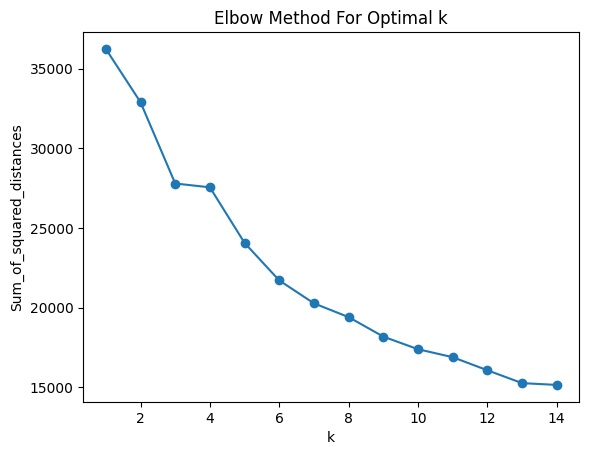

In [ ]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []

# Use k from 1 to 15
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, max_iter=300, random_state=None)
    km = km.fit(city_groups_std[features_to_explore])
    # Get sum of square distances by applying km.inertia_
    Sum_of_squared_distances.append(km.inertia_)

# Plot Results
plt.plot(K, Sum_of_squared_distances, marker='o')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Silhouette coefficient

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(city_groups_std[features_to_explore])
    label = kmeans.labels_
    sil_coeff = silhouette_score(city_groups_std[features_to_explore], label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

#the higher the coefficient, more likely its our K

For n_clusters=2, The Silhouette Coefficient is 0.23338857115394823
For n_clusters=3, The Silhouette Coefficient is 0.2707075805365758
For n_clusters=4, The Silhouette Coefficient is 0.2519059135620243
For n_clusters=5, The Silhouette Coefficient is 0.26063080123596144
For n_clusters=6, The Silhouette Coefficient is 0.2650252896836987
For n_clusters=7, The Silhouette Coefficient is 0.18910383818418103
For n_clusters=8, The Silhouette Coefficient is 0.15950204848999078
For n_clusters=9, The Silhouette Coefficient is 0.12385634896912494
For n_clusters=10, The Silhouette Coefficient is 0.1762428534379319


# Conclusion: K=3

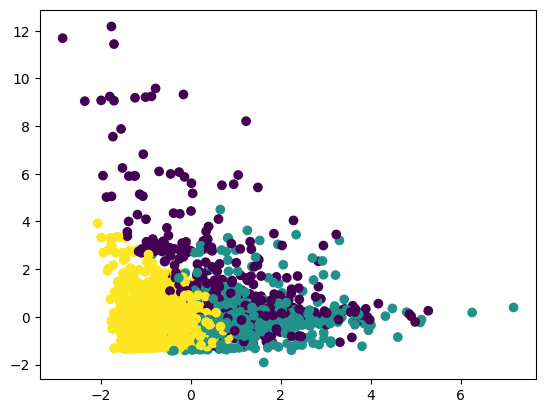

In [ ]:
km = cluster.KMeans(n_clusters=3, max_iter=300, random_state=None)
city_groups_std['cluster'] = km.fit_predict(city_groups_std[features_to_explore])

# Principal Component Analysis for Visualization
pca = decomposition.PCA(n_components=2, whiten=True)
pca.fit(city_groups[features_to_explore])
city_groups_std['x'] = pca.fit_transform(city_groups_std[features_to_explore])[:, 0]
city_groups_std['y'] = pca.fit_transform(city_groups_std[features_to_explore])[:, 1]
plt.scatter(city_groups_std['x'], city_groups_std['y'], c=city_groups_std['cluster'])
plt.show()

# Inspecting the clusters

In [ ]:
# Let's merge the two dataframes based on a common column user_location_city
city_groups.merge(city_groups_std[['user_location_city', 'cluster']]).groupby('cluster').mean() # for every column

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
cluster,,,,,,,,,
0,29612.422662,4.280450,104.151528,4324.562580,0.088729,0.086339,2.544721,0.428395,1.409567
1,28358.872964,4.974659,78.818074,1880.199486,0.141412,0.726994,2.021805,0.307743,1.085469
2,28148.247872,2.722881,40.865191,1310.617667,0.141388,0.137703,1.996063,0.368230,1.078202


<Axes: xlabel='cluster'>

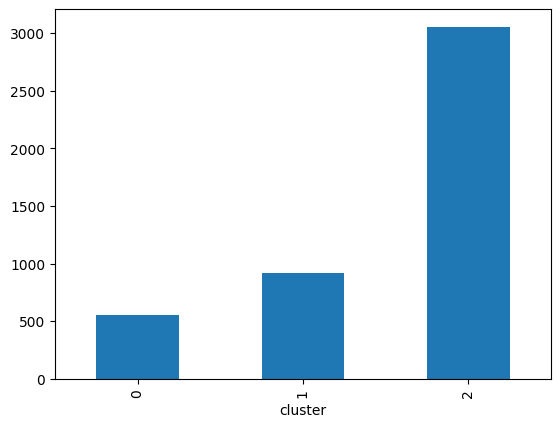

In [ ]:
# Plot our Cluster Counts
city_groups_std.groupby('cluster')['user_location_city'].agg('count').plot(kind='bar')

# Now I want to use Decision Tree model to determine which features influenced bookings the most

In [98]:
Y = travel['is_booking']
X = travel[[ 'user_location_country', 'user_location_region', 'user_location_city',
       'orig_destination_distance',
       'channel', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id', 'hotel_continent', 'hotel_country',
       'count', 'duration', 'days_in_advance']]
X

,user_location_country,user_location_region,user_location_city,orig_destination_distance,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,count,duration,days_in_advance
0,77,871,36643,456.1151,1,2,0,1,8286,1,0,63,2,4.0,42.0
1,205,135,38749,232.4737,9,2,0,1,1842,3,2,198,1,1.0,0.0
2,66,314,48562,4468.2720,9,2,0,1,8746,1,6,105,1,7.0,172.0
3,205,411,52752,171.6021,0,2,0,1,6210,3,2,198,2,1.0,2.0
4,66,174,50644,NaN,9,2,1,1,12812,5,2,50,1,5.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,66,351,21609,1386.4061,3,2,0,1,762,6,2,50,1,4.0,97.0
99996,66,462,49272,698.1395,9,1,0,1,12843,5,2,50,1,1.0,1.0
99997,69,998,52849,NaN,9,6,0,3,18773,1,6,22,1,7.0,98.0
99998,66,246,28491,207.2549,4,2,0,1,8859,1,2,50,1,2.0,11.0


In [99]:
from sklearn import tree
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size=0.1,random_state=42)

dec_tree_model = tree.DecisionTreeClassifier(max_depth=5)

In [100]:
dec_tree_model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5)

In [101]:
features = list(X_train.columns)
response_var = 'is_booking'

In [102]:
features

['user_location_country',
 'user_location_region',
 'user_location_city',
 'orig_destination_distance',
 'channel',
 'srch_adults_cnt',
 'srch_children_cnt',
 'srch_rm_cnt',
 'srch_destination_id',
 'srch_destination_type_id',
 'hotel_continent',
 'hotel_country',
 'count',
 'duration',
 'days_in_advance']

In [103]:
from sklearn.base import clone

def imp_df(column_names, importances):
  df = pd.DataFrame({'feature': column_names,
                     'feature_importance': importances}).sort_values('feature_importance', ascending = False).reset_index(drop = True)
  return df

def drop_col_feat_imp(model, X_train, y_train, random_state = 42):

    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(X_train, y_train)
    # list for storing feature importances
    importances = []

    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        drop_col_score = model_clone.score(X_train.drop(col, axis = 1), y_train)
        importances.append(benchmark_score - drop_col_score)

    importances_df = imp_df(X_train.columns, importances)
    return importances_df

In [104]:
drop_col_feat_imp(dec_tree_model, X_train, Y_train)

,feature,feature_importance
0,days_in_advance,0.000067
1,user_location_city,0.000044
2,duration,0.000044
3,orig_destination_distance,0.000033
4,srch_rm_cnt,0.000022
5,srch_destination_id,0.000011
6,user_location_country,0.000000
7,user_location_region,0.000000
8,channel,0.000000
9,srch_children_cnt,0.000000


#Testing the accuracy

In [105]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = dec_tree_model.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(y_pred, y_test)))

print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, dec_tree_model.predict_proba(X_test)[:,1])
print(f"AUC-ROC Score: {auc_score:.2f}")

Accuracy 92.25%
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      9997
           1       0.00      0.00      0.00         1

    accuracy                           0.92      9998
   macro avg       0.50      0.46      0.48      9998
weighted avg       1.00      0.92      0.96      9998

[[9223  774]
 [   1    0]]
AUC-ROC Score: 0.66
